               0         1         2         3         4         5    \
970nm.1   0.005398  0.005942  0.007077  0.006672  0.011711  0.005518   
1200nm.1  0.003886  0.004538  0.005099  0.005649  0.009522  0.004994   
1300nm.1  0.003506  0.002778  0.003027  0.003033  0.004838  0.003787   
Diabetes -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
Eating   -1.000000  1.000000  1.000000 -1.000000  1.000000  1.000000   

               6         7         8         9      ...          162  \
970nm.1   0.005059  0.005355  0.007170  0.009674    ...     0.011732   
1200nm.1  0.004203  0.005245  0.006376  0.007155    ...     0.005688   
1300nm.1  0.003823  0.004774  0.004211  0.004294    ...     0.004158   
Diabetes -1.000000 -1.000000 -1.000000 -1.000000    ...     1.000000   
Eating   -1.000000  1.000000  1.000000 -1.000000    ...    -1.000000   

               163       164       165       166       167       168  \
970nm.1   0.014360  0.012180  0.008807  0.005999  0.007028  0.

Iteration:  70 		Error:  0.11336545839695321 	scale factor:  0.003
Iteration:  71 		Error:  0.11298551572118173 	scale factor:  0.003
Iteration:  72 		Error:  0.1126318930938717 	scale factor:  0.003
Iteration:  73 		Error:  0.11230357744797176 	scale factor:  0.003
Iteration:  74 		Error:  0.11199995211201991 	scale factor:  0.003
Iteration:  75 		Error:  0.11172027592774342 	scale factor:  0.003
Iteration:  76 		Error:  0.11146324709936478 	scale factor:  0.003
Iteration:  77 		Error:  0.1112268292159323 	scale factor:  0.003
Iteration:  78 		Error:  0.11118865271733927 	scale factor:  0.00030000000000000003
Iteration:  79 		Error:  0.10991115585953651 	scale factor:  0.00030000000000000003
Iteration:  80 		Error:  0.10827982488027577 	scale factor:  0.00030000000000000003
Iteration:  81 		Error:  0.10724616919403061 	scale factor:  0.00030000000000000003
Iteration:  82 		Error:  0.10650463744704543 	scale factor:  0.00030000000000000003
Iteration:  83 		Error:  0.10594527704504973 	

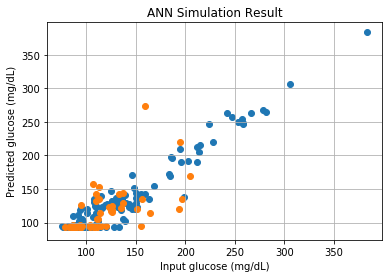

測試組原本的糖值: 
 [[151.  204.5  90.  120.   94.   95.  104.   83.  197.  125.  107.  104.
   87.   86.   95.  156.5 135.   94.   93.  195.  126.   96.   88.   90.
  126.   86.  108.  137.  194.   94.  115.  126.  125.   79.  164.  133.
  110.   93.  137.   95.   86.  114.  112.  155.  159.  111.  111.  113.
  123.  113.  108.  110. ]]
測試組預測的糖值: 
 [120.95708975 169.06953579  94.15755511  94.5097665   94.09841544
  93.93651808  94.0780167   93.95551155 135.05042612 117.66205594
 157.90968812  97.02824403  96.80633008  93.89009937  94.03236257
 135.35659963 121.08051792  96.16730203  94.27599863 220.36840054
 124.67587132  94.52067522  93.96590917  93.83389829 118.60228803
  94.31161497  93.93790591 144.20865982 119.57051368  93.96314136
  94.32840315 116.46214668 120.51692058  93.69197959 114.21633843
 142.26448531 131.55017067  94.4779623  129.30051762 126.06154503
  93.95824235 114.74366872 105.92211828  95.18016455 273.48116722
  93.5068919  105.18710144 135.88410349 122.96700957 153.06425

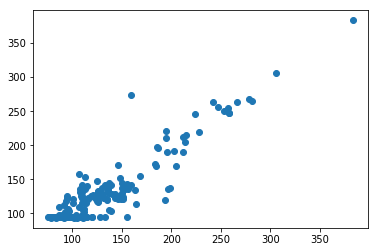

In [2]:
#導入函數庫
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyrenn as prn
from sklearn.model_selection import train_test_split

#----------------------需要設定的參數----------------------------------------------
#檔名參數
file_name = 'ANN_training_data_AC_combination_1213'
#輸入特徵參數
features_Num = 10
#輸入訓練次數
iteration = 100
#輸入第一隱藏層特徵數
hiddenlayer1_features = 3
#輸入第二隱藏層特徵數
hiddenlayer2_features = 3
#----------------------需要設定的參數----------------------------------------------

#------------------------------讀檔創建Dataframe---------------------------------
#filepath='C:\\Users\\richard.weng\\Documents\\Python Scripts\\python_projects\\(1) NIVG Project\\ANN\\'
file_data = file_name+'.csv'
df0 = pd.read_csv(file_data)

#選擇受測人
#df = df[df.Name=='Nick']
df = df0.iloc[:,1:] #移除first column of tester

print (df.T.tail())
print ('--------------------------------------------')
print ('df 長度為:',len(df))
print ('--------------------------------------------')
P = df.T.iloc[1:features_Num+1,0:len(df)]
print(P.tail())
print('input的格式:',P.shape)
print ('--------------------------------------------')
Y = df.T.iloc[0:1,0:len(df)]
print(Y.tail())
print('output的格式:',Y.shape)
print ('--------------------------------------------')
#轉成2d array
P = np.array(P)
Y = np.array(Y)

# 假設70%訓練，30%要驗證 (TrainingData and TestingData)
x_train, x_test, y_train, y_test = train_test_split(P.T,Y.T,test_size=0.3,random_state= None)
x_of_train = (x_train/np.amax(x_train, axis=0)).T
x_of_test = (x_test/np.amax(x_train, axis=0)).T
y_of_train = y_train.T/600
y_of_test = y_test.T/600
#------------------------------讀檔創建Dataframe---------------------------------

#----------------------------ANN 主程式---------------------------------------------
#8 input,2 hidden layer, 3 neuron (create NN)
net = prn.CreateNN([features_Num,hiddenlayer1_features,hiddenlayer2_features,1])
# Train by NN
net = prn.train_LM(x_of_train,y_of_train,net,verbose=True,k_max=iteration,E_stop=1e-10)
# print out result
y_prn_train = prn.NNOut(x_of_train,net)
y_prn_test = prn.NNOut(x_of_test,net)
# print('x train data 預測的 Predicted Y:','\n',y_prn_train*600)
# print('x test data 預測的 Predicted Y:','\n',y_prn_test*600)
#----------------------------ANN 主程式---------------------------------------------

#----------------------------確認執行後的結果------------------------------------------
# visualize result
plt.scatter(y_of_train*600, y_prn_train*600)
plt.scatter(y_of_test*600, y_prn_test*600)
plt.title('ANN Simulation Result')
plt.xlabel('Input glucose (mg/dL)')
plt.ylabel('Predicted glucose (mg/dL)')
plt.grid()
plt.show()
print ('測試組原本的糖值:','\n',y_of_test*600)
print ('測試組預測的糖值:','\n',y_prn_test*600)
#----------------------------確認執行後的結果------------------------------------------

#Save ANN
prn.saveNN(net, file_name+'_LM_parameter'+'.csv')

#----------------------------確認執行後的結果------------------------------------------
#Check final correlation
y_all = prn.NNOut((P.T/np.amax(x_train, axis=0)).T,net)*600
plt.scatter(Y.flatten(),y_all)
Name = df0['Name'].values.tolist()
df_result = pd.DataFrame({'Name': Name,'total_y': Y.flatten(), 'total_pre_y': y_all})
print('相關性分析:\n',df_result.corr())
#列印出多少數據
print('總共樣本數:',len(df_result))
#Save the new result into new Excel
df_result.to_csv(file_name+'_LM_result'+'.csv')

#load NN method for feature work
#net = prn.loadNN('LM_glucose_test.csv')
#----------------------------確認執行後的結果------------------------------------------